In [1]:
import pandas as pd
df=pd.read_csv('train.csv')
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


### 1. Understanding the data

In [2]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [3]:
df.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [4]:
df.dtypes

ID                   int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jaundice            object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD            int64
dtype: object

In [5]:
pd.set_option('display.max_columns', None) #displays all columns

In [6]:
for col in df.columns:
    if col=='age' or col=='ID' or col=='result':
        continue
    print(col, df[col].unique())
    print()

A1_Score [1 0]

A2_Score [0 1]

A3_Score [1 0]

A4_Score [0 1]

A5_Score [1 0]

A6_Score [0 1]

A7_Score [1 0]

A8_Score [0 1]

A9_Score [1 0]

A10_Score [1 0]

gender ['f' 'm']

ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']

jaundice ['no' 'yes']

austim ['no' 'yes']

contry_of_res ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan' 'Iran' 'Argentina' 'Japan' 'Mexico' 'Nicaragua' 'Sierra Leone'
 'Czech Republic' 'Niger' 'Romania' 'Cyprus' 'Belgium' 'Burundi'
 'Bangladesh'

In [7]:
df['age']=df['age'].astype(int)
df.replace('Viet Nam', 'Vietnam', inplace=True)

In [8]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [9]:
df.drop(columns=['ID', 'age_desc'], inplace=True)
df.size

16000

In [10]:
df.shape

(800, 20)

In [11]:
df['contry_of_res']=df['contry_of_res'].replace({
    'AmericanSamoa': 'United States', 
    'Hong Kong': 'China'
})

In [12]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [13]:
#target class distribution
df['Class/ASD'].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

**Insights**
1. missing values in ethnicity and relation
2. age_desc dropped
3. Fixed country names
4. class imbalance in target columns

### 2. Exploratory Data Analysis

In [14]:
df.head(3)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1


In [15]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**Univariate Analysis**

Numerical columns
- Age
- Result

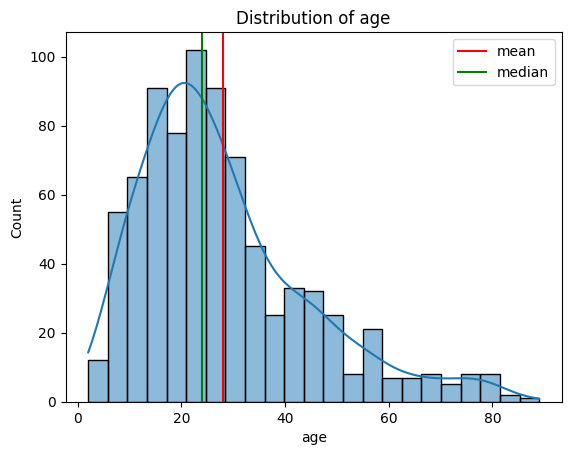

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_age=df['age'].mean()
median_age=df['age'].median()

sns.histplot(df['age'], kde=True)
plt.title('Distribution of age')
plt.axvline(mean_age, color='red', label='mean')
plt.axvline(median_age, color='green', label='median')
plt.legend()
plt.show()

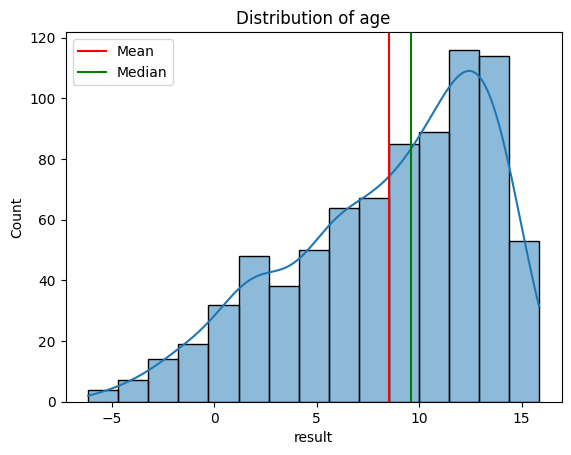

In [17]:
sns.histplot(df['result'], kde=True)
plt.title('Distribution of age')
plt.axvline(df['result'].mean(), label='Mean', color='red')
plt.axvline(df['result'].median(), label='Median', color='green')
plt.legend()
plt.show()

Box plot for outliers

<Axes: >

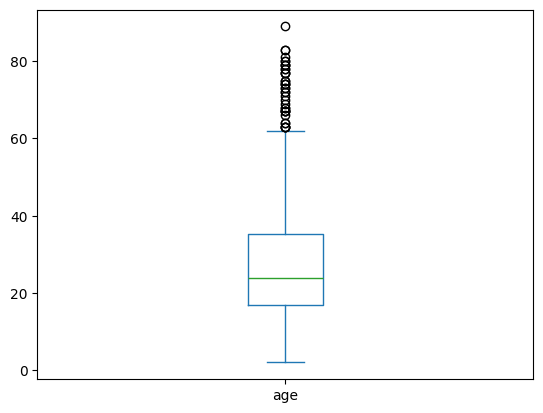

In [18]:
df['age'].plot(kind='box')

<Axes: >

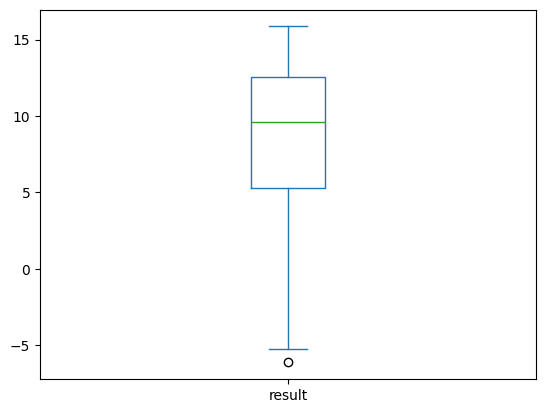

In [19]:
df['result'].plot(kind='box')

In [20]:
# detect age outliers
q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
uppper_bound=q3+1.5*iqr
outliers=df[(df['age']<lower_bound) | (df['age']>uppper_bound)].values
print('number of age outliers=',len(outliers))

number of age outliers= 39


In [21]:
# detect result outliers
q1=df['result'].quantile(0.25)
q3=df['result'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
uppper_bound=q3+1.5*iqr
outliers=df[(df['result']<lower_bound) | (df['result']>uppper_bound)].values
print('number of result outliers=',len(outliers))

number of result outliers= 1


**Univariate analysis of Categorical Features**

In [22]:
print(df.columns)
categorical_columns=[col for col in df.columns if df[col].dtype==object or col.startswith('A')]
print(categorical_columns)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')
['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']


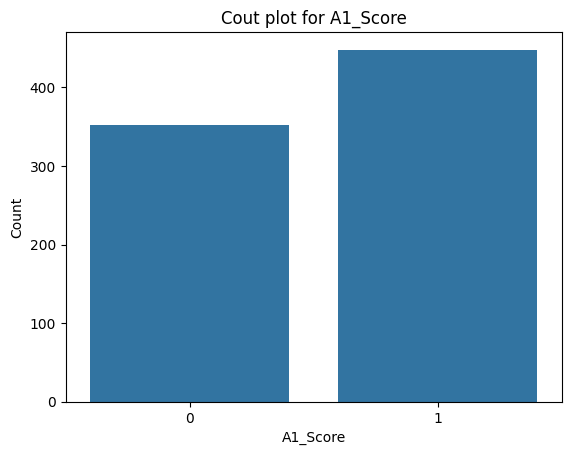

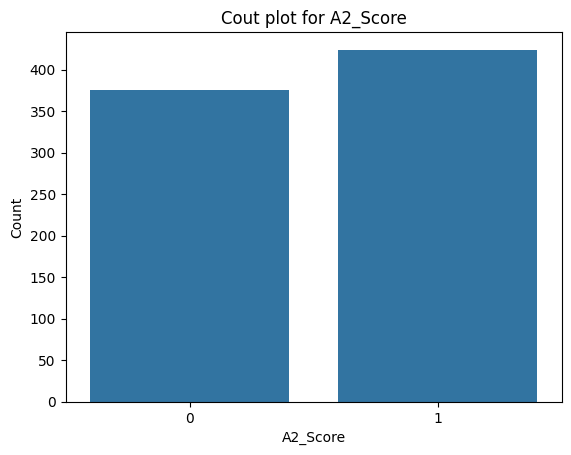

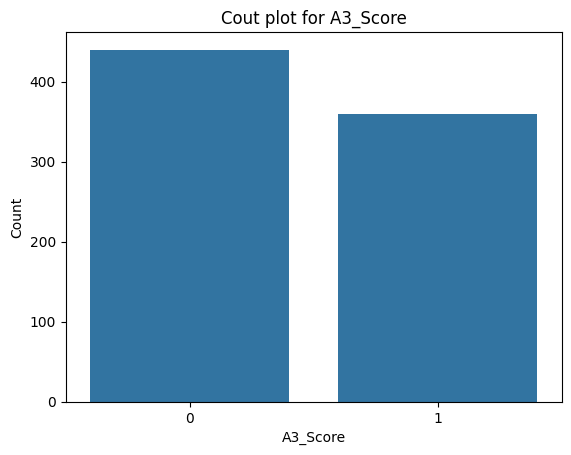

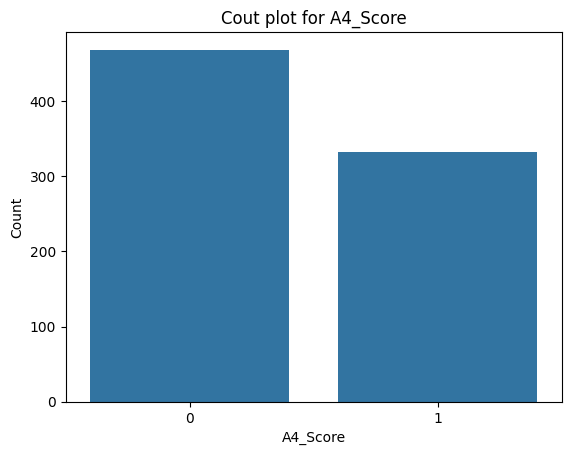

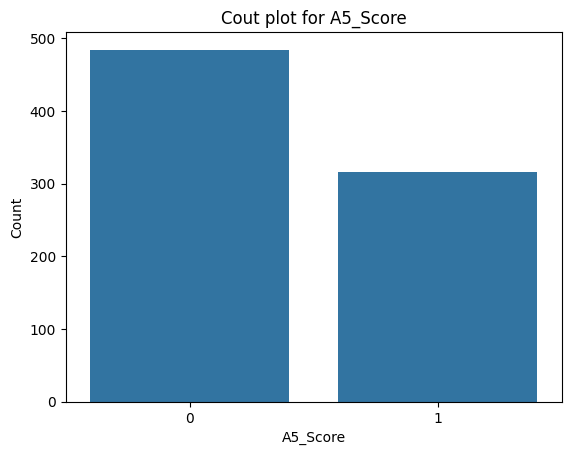

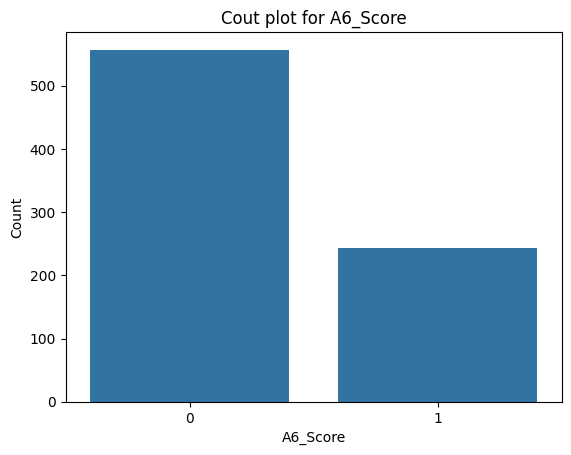

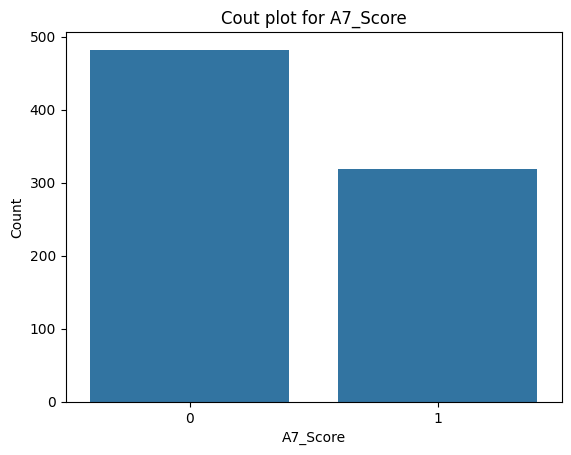

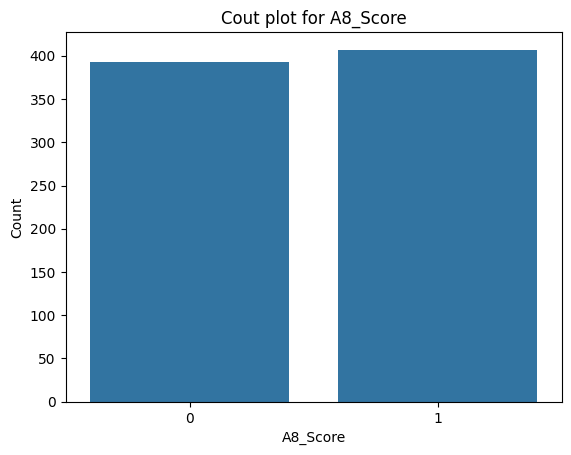

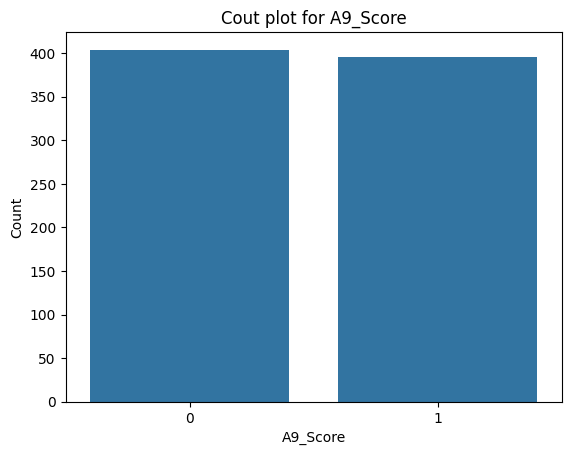

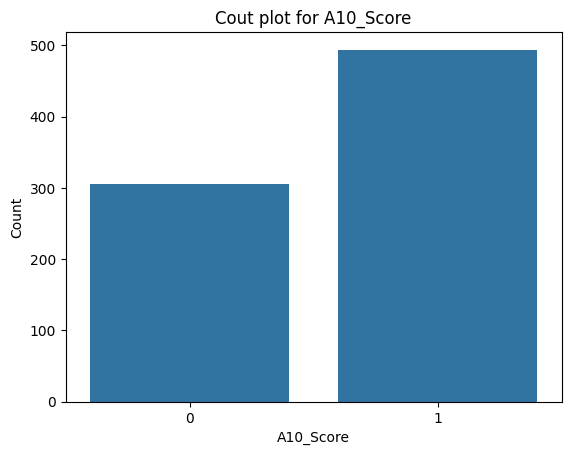

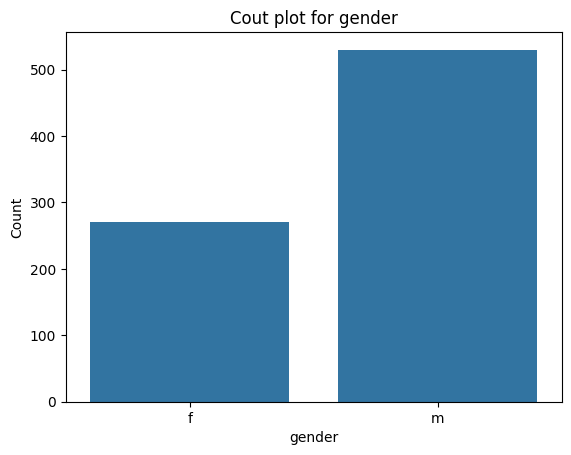

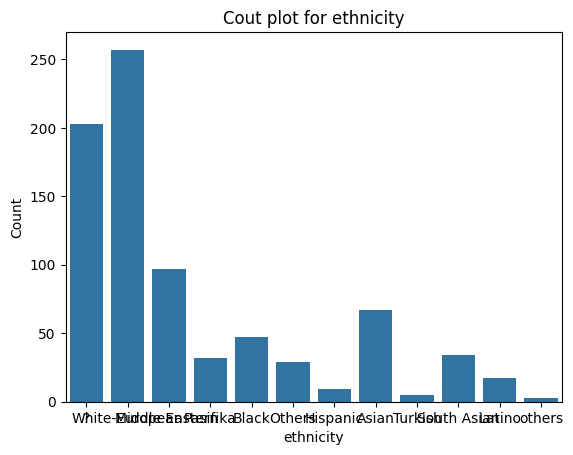

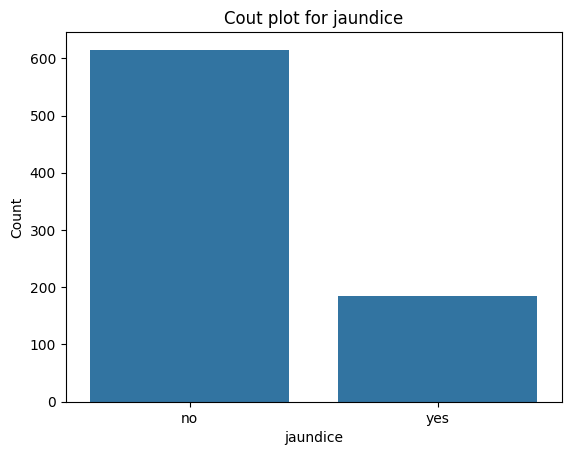

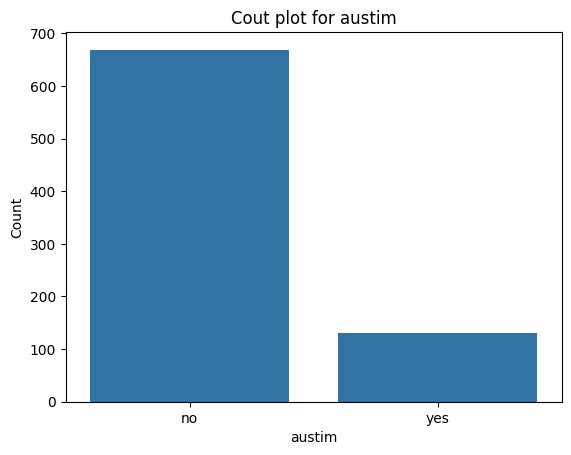

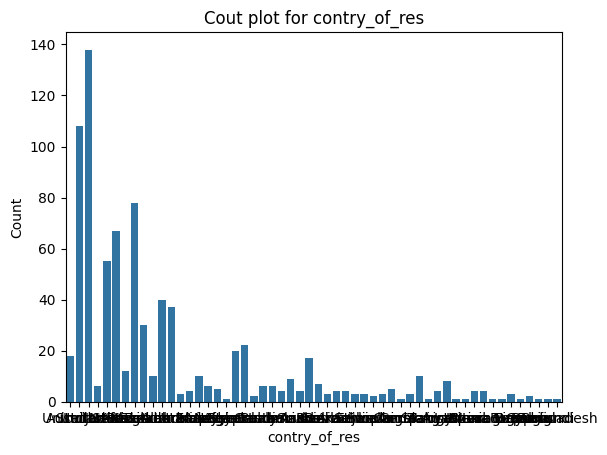

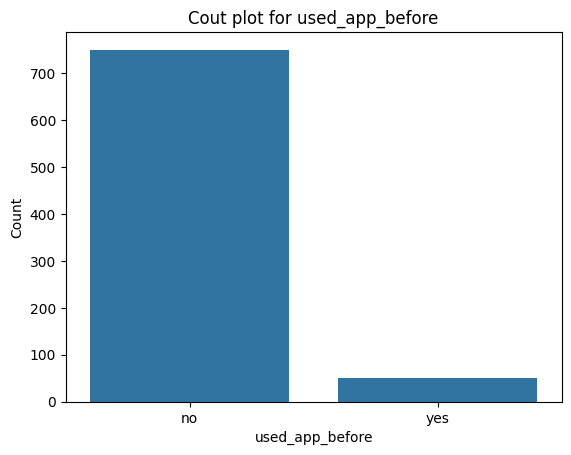

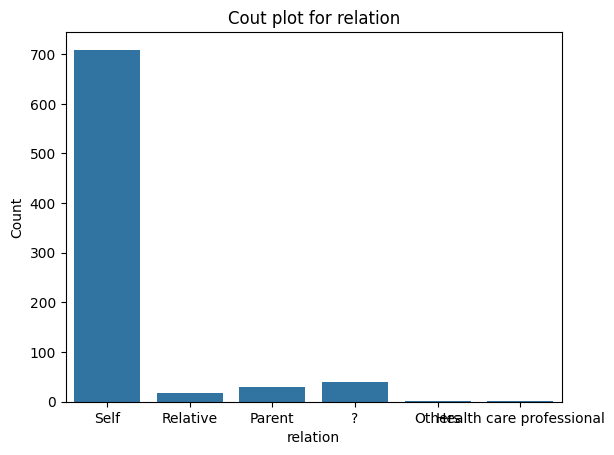

In [23]:
for col in categorical_columns:
    sns.countplot(x=df[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Cout plot for {col}')
    plt.show()

Text(0.5, 1.0, 'Distribution for Class')

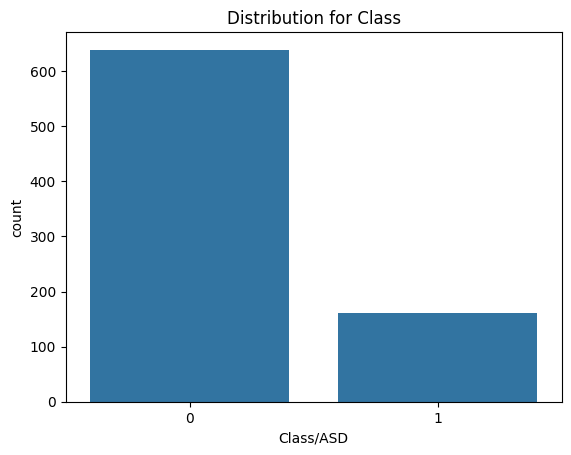

In [24]:
#Count plot for target column
sns.countplot(x=df['Class/ASD'])
plt.title('Distribution for Class')

In [25]:
df['Class/ASD'].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

Handling missing values in ethnicity and relation

In [26]:
df['ethnicity'].unique()

array(['?', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Others', 'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino',
       'others'], dtype=object)

In [27]:
df['relation'].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [28]:
df['ethnicity']=df['ethnicity'].replace({'?': 'Oheres', 'others': 'Others'})

def impute_relation(text:str):
    if text=='Self':
        return text
    else:
        return 'Others'

df['relation']=df['relation'].apply(impute_relation)

In [29]:
print(df['ethnicity'].unique())
print(df['relation'].unique())

['Oheres' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino']
['Self' 'Others']


**Label Encoding**

In [30]:
object_columns=[col for col in df.columns if df[col].dtype==object]
print(object_columns)

['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']


In [31]:
from sklearn.preprocessing import LabelEncoder

encoder={}

for col in object_columns:
    label_encoder=LabelEncoder()
    df[col]=label_encoder.fit_transform(df[col])
    encoder[col]=label_encoder

import pickle
pickle.dump(encoder, open('encoder.pkl', 'wb'))

In [32]:
encoder['gender'].transform(['m', 'f'])

array([1, 0])

**Bivariate Analysis**

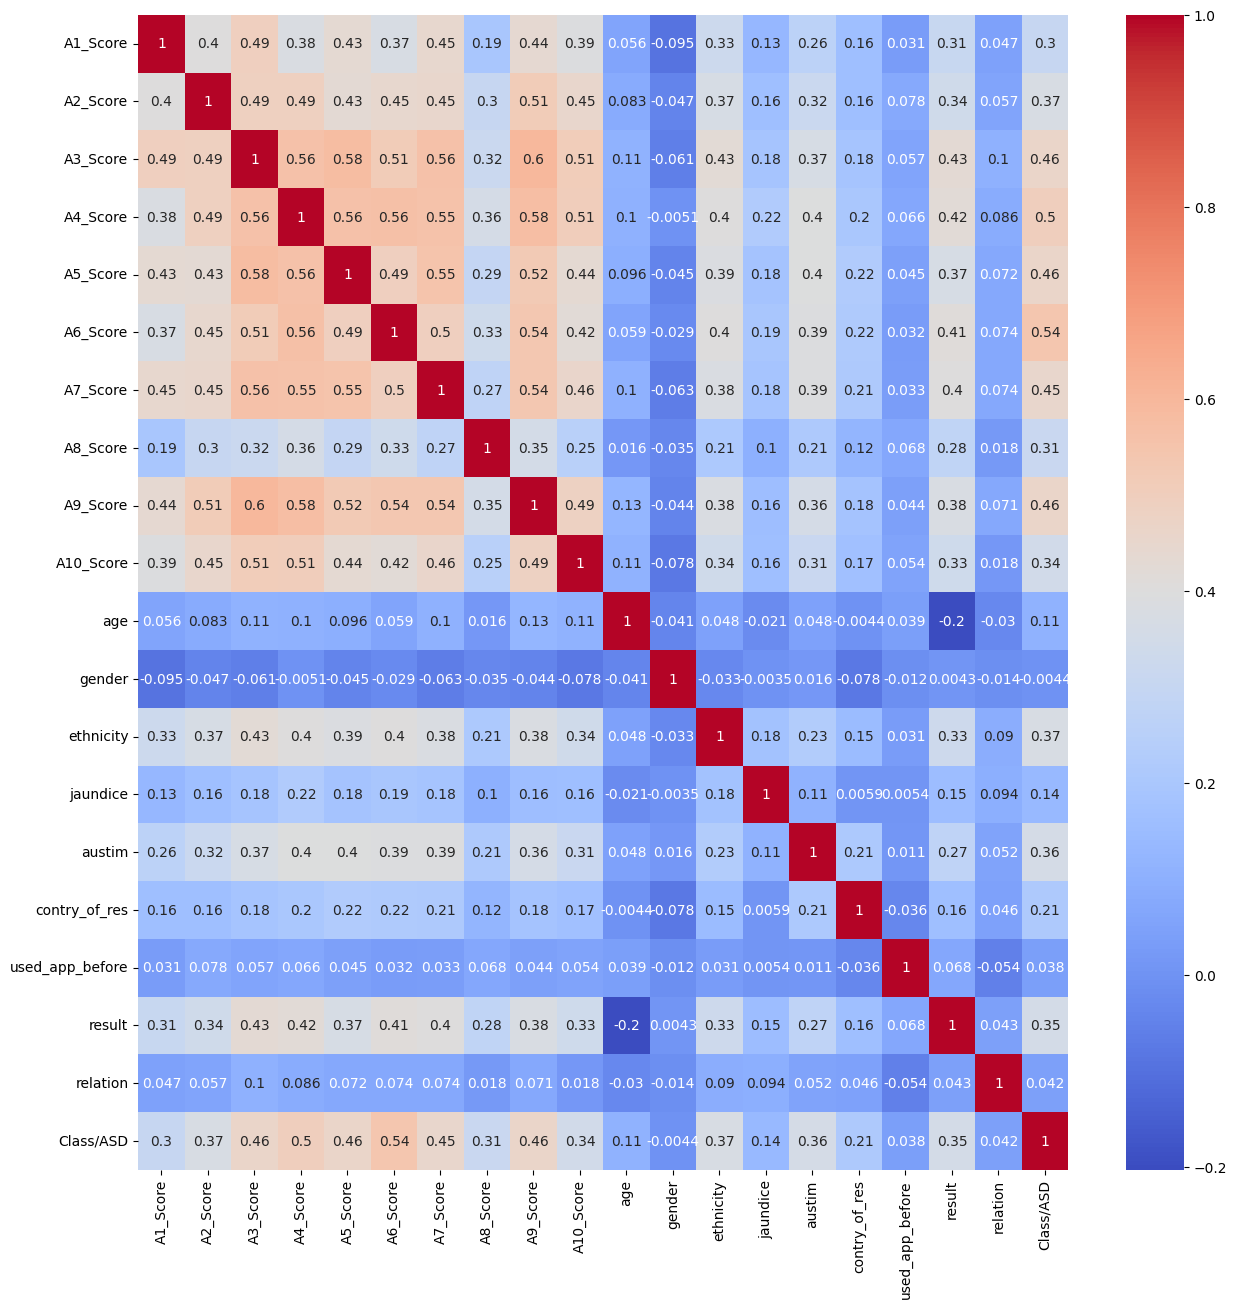

In [33]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

**Insights**
1. Outliers in age, only 1 in results
2. Class imbalance in target column and some categorial features
3. No corellated column
4. Label encoding done

### 3. Data Preprocessing

**Outlier removal**

In [34]:
def replace_outlier(df, column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    uppper_bound=q3+1.5*iqr
    median=df[column].median()
    df[column]=df[column].apply(lambda x: median if x< lower_bound or x> uppper_bound else x)
    return df

In [35]:
'age' in df.columns

True

In [36]:
df=replace_outlier(df, 'age')
df=replace_outlier(df, 'result')

In [37]:
df.head(3)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,10,0,1,52,0,14.851484,1,1


In [38]:
X=df.drop(columns=['Class/ASD']).values
y=df['Class/ASD'].values
print(X.shape, y.shape)

(800, 19) (800,)


**Train Test Split**

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [40]:
from collections import Counter
Counter(y_train)

Counter({0: 514, 1: 126})

**SMOTE**

In [41]:
from imblearn.over_sampling import SMOTE

smote=SMOTE()
X_train, y_train=smote.fit_resample(X_train, y_train)

c:\Users\anasm\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\anasm\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\anasm\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\anasm\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

In [42]:
Counter(y_train)

Counter({1: 514, 0: 514})

### 4.Model Training

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [44]:
models={
    'Decision Tree':  DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

In [45]:
from sklearn.metrics import accuracy_score

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print(f'accuracy for {model_name}={accuracy_score(y_pred, y_test)}')

accuracy for Decision Tree=0.80625
accuracy for RandomForest=0.85
accuracy for XGBoost=0.84375


In [46]:
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
accuracy_score(y_pred, y_test)

0.84375

In [47]:
pickle.dump(rfc, open('model.pkl', 'wb'))

### Building Prediction Model

In [50]:
for col in df.columns:
    if col=='age' or col=='ID' or col=='result':
        continue
    print(col, df[col].unique())

A1_Score [1 0]
A2_Score [0 1]
A3_Score [1 0]
A4_Score [0 1]
A5_Score [1 0]
A6_Score [0 1]
A7_Score [1 0]
A8_Score [0 1]
A9_Score [1 0]
A10_Score [1 0]
gender [0 1]
ethnicity [ 5 10  4  7  1  6  2  0  9  8  3]
jaundice [0 1]
austim [0 1]
contry_of_res [ 6 23 52 44 29 51 12 34 14 30 50  5 49 25 20 31 53 18 33  0 37 27  8 41
 26  4 46 40 11  7  3 42 19 47 22 15  1 21 45 48 38 24  2 28 32 35 43 17
 36 39 16 10 13  9]
used_app_before [0 1]
relation [1 0]
Class/ASD [0 1]


In [56]:
print(encoder['contry_of_res'].classes_)
print(encoder['contry_of_res'].transform(encoder['contry_of_res'].classes_))
'other' in encoder['contry_of_res'].classes_

['Afghanistan' 'Angola' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Belgium' 'Bolivia'
 'Brazil' 'Burundi' 'Canada' 'China' 'Cyprus' 'Czech Republic' 'Egypt'
 'Ethiopia' 'France' 'Germany' 'Iceland' 'India' 'Iran' 'Iraq' 'Ireland'
 'Italy' 'Japan' 'Jordan' 'Kazakhstan' 'Malaysia' 'Mexico' 'Netherlands'
 'New Zealand' 'Nicaragua' 'Niger' 'Oman' 'Pakistan' 'Romania' 'Russia'
 'Saudi Arabia' 'Serbia' 'Sierra Leone' 'South Africa' 'Spain' 'Sri Lanka'
 'Sweden' 'Tonga' 'Ukraine' 'United Arab Emirates' 'United Kingdom'
 'United States' 'Vietnam']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53]


False

In [57]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [58]:
import numpy as np

def predict(A1_Score, A2_Score, A3_Score, A4_Score, A5_Score, A6_Score,
       A7_Score, A8_Score, A9_Score, A10_Score, age, gender,
       ethnicity, jaundice, austim, contry_of_res, used_app_before,
       result, relation):
    X=np.array([A1_Score, A2_Score, A3_Score, A4_Score, A5_Score, A6_Score,
       A7_Score, A8_Score, A9_Score, A10_Score, age, gender,
       ethnicity, jaundice, austim, contry_of_res, used_app_before,
       result, relation])
    X=X.reshape(1, -1)
    return rfc.predict(X)[0]

In [62]:
predict(*df.drop(columns=['Class/ASD']).iloc[0].values)

0

In [63]:
df['Class/ASD'][0]

0

In [65]:
print(df['result'].max())
print(df['result'].min())

15.85312603
-5.264833431
